## 7. pn Junction Diode: small-signal admittance
### 7.1 Introduction
$$Y=G+jwC$$

### 7.2 Reverse-Bias junction capacitance
### 7.2.1 General Information
$$C_J=\frac{K_s\varepsilon A}{W}$$

### 7.2.2 C-V relationship
asymmetrical step junction
$$W=\left[\frac{2K_s \varepsilon_0}{qN_B}(V_{bi}-V_A) \right]^\frac{1}{2}$$

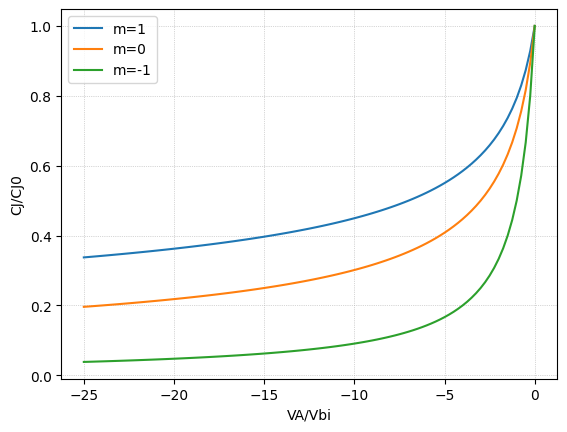

In [2]:
# python coding, x축을 먼저 만들고, y축을 만든다.
# 아래와 같이 x축 변수 말고, 다른 변수 m을 for 문 안에 넣을 경우, for 문이 되지만,
# 변수를 for 밖에서 수식을 만들경우, array를 사용해서 아래와 같이 만들어야 한다.
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

x=np.linspace(-25,0,101) #VA/Vbi
m=np.array([1,0,-1])
s=1/(m+2)
for i in range(len(m)):
    y=1/(1-x)**s[i] #CJ/CJ0
    plt.plot(x,y,label=f"m={m[i]}")
    
#plt.xlim(0,1), plt.ylim(1e-10,1e-1)
plt.xlabel("VA/Vbi"), plt.ylabel("CJ/CJ0")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

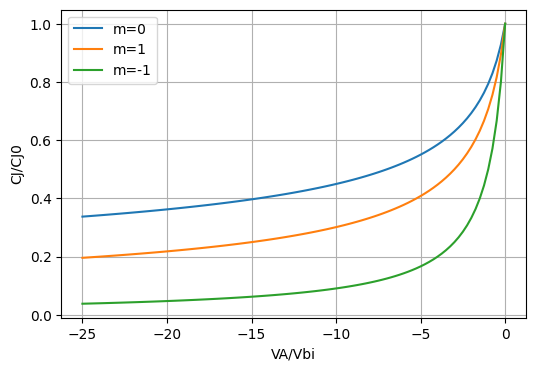

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-25, 0, 101)  # VA/Vbi

plt.figure(figsize=(6, 4))

for i in [1,0,-1]:
    s=1/(i+2)
    y = 1 / (1 - x) ** s
    plt.plot(x, y, label=f"m={m[i]}")

plt.xlabel("VA/Vbi")
plt.ylabel("CJ/CJ0")
plt.legend()
plt.grid()
plt.show()


### 7.2.3 Parameter Extraction/Profiling
$$\frac{1}{C_J^2}=\frac{2}{qN_B K_s \epsilon_0 A^2}(V_{bi}-V_A) $$
$$y=\left(\frac{1}{C_J^2}\right)=a-bV_A$$
NB, Vbi를 구할 수 있다.
$$N_B(x)=\frac{2}{qK_s \epsilon_0 A^2|d(1/C_J^2)/dVA|} \quad x=\frac{K_s \epsilon_0 A}{C_J}$$
1/CJ^2 vs VA plot 에서 x축 절편은 Vbi가 된다.\
y=a(Vbi-x) 그래프에서 Vbi만큼 x 축으로 이동한 그래프가 된다.

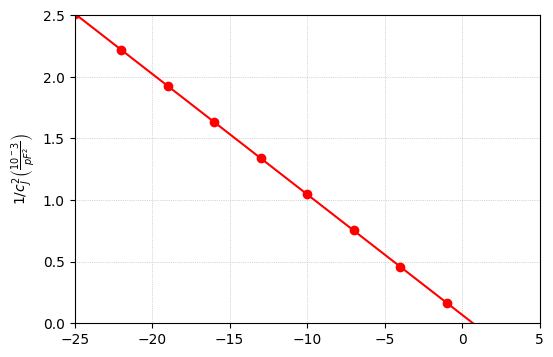

NA=8.90e+15/cm3
Vbi=0.70V


In [75]:
# Exercise 7.2 page 311
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

A=3.72e-3 #cm2
a=6.89e19
b=9.78e19

VA=np.linspace(-25, 5, 11)
overCJ2=a-b*VA

plt.figure(figsize=(6, 4))
plt.plot(VA, overCJ2*1e-21, 'ro-')
plt.xlim(-25,5), plt.ylim(0, 2.5)
plt.ylabel(r"$1/c_J^2 \left(\frac{10^-3}{pF^2} \right)$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()

NA=2/(q*e_si*e0*A**2*b)
print(f"NA={NA:.2e}/cm3")
Vbi=a/b
#print("Vbi=%.2f"%Vbi)
print(f"Vbi={Vbi:.2f}V")

### 7.2.4 Reverse-Bias Conductance
symbol $G_0$ for the associated low-frequency conductance
$$G_0=\frac{dI}{dV_A}\quad . . . \quad I=I_0[exp(qV_A/kT)-1]$$
Ideal Diode
$$G_0=\frac{q}{kT}I_0e^{qV_A/kT}=\frac{q}{kT}(I+I_0)$$
When the reverse bias exceeds a few kT/q volts in an ideal diode, $I\rightarrow -I_0$ amd $G_0 \rightarrow 0$.\
for reverse biases greater than a few kT/q. carrier become quite smal thr most of the depletion region. $n\rightarrow0, p\rightarrow0$
$$I_{R-G}=-\frac{qAn_i}{2\tau_0}W$$
If the dc recombination-generation current dominates in the given diode then, for reverse biases greater than a few kT/q volts,
$$G_0=\frac{d}{dV_A}\left(-\frac{qAn_i}{2\tau_0}W\right)=\frac{qAn_iW/2\tau_0}{(m+2)(V_{bi}-V_A)} \quad ... \quad I_{R-G}\ dominant$$
where use has been made of the Eq(7.6) relationship for W
Inside a pn junction with a one-side power-law profile, the depletion width dependence for m>-2 is
$$W=\left[\frac{(m+2)K_s \varepsilon_0}{qb}(V_{bi}-V_A) \right]^\frac{1}{(m+2)}$$
For m=0,b=NB where NB without a trailing(x) is understood to be a position-independent constant.
$$W=\left[\frac{2K_s \varepsilon_0}{qN_B}(V_{bi}-V_A) \right]^\frac{1}{2}$$
linearly graded junction, m=1, b=a/4
G0 indicates there is a residual conductance at all reverse biases, with the precise voltage dependence varing with the doping profile of the junction.

In [20]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
# Exercise 7.3
# CJ=63pF at VA=-10V, RS=1ohm, VA=-10V, f=100kHz, Rs,G=G0 may be totally neglected in modeling the admittance of the device
# Y=G+jwC
dI=40*1e-12
dVA=18
G0=dI/dVA #Simens
print("G0=%.2e" %G0)
CJ=63*1e-12
f=100*1e3
wCJ=2*np.pi*f*CJ #Simens
print("wCJ=%.2e"%wCJ)
# G0(conductive component)는 wCJ(capacitive component) 보다 훨씬 작다.
# Next, consider the series resistance. Since Rs is in series with Y, we need to compare |Z|=1/|Y| with Rs, Rs=1ohm
Z=1/wCJ #ohm
print("Z=%.2e"%Z)

G0=2.22e-12
wCJ=3.96e-05
Z=2.53e+04


### 7.3 Forward-Bias diffusion admittance
### 7.3.1 Genernal Information
The minority carrier build-up about the edges of the depletion region is caused byy the diffusion current, the admittance associated with the minority carrier charge oscillation is called the diffusion admittance, $Y_D$.
$$Y_D=G_D+j\omega C_D$$
where $C_D$ and $G_D$ are the diffusion capacitance and diffusion conductance, respectively.
### 7.3.2 Admittance Relationships
$$Y_D=\frac{i_{diff}}{v_a}=G_0\sqrt{1+j\omega \tau_0} \quad v_a = applied\ voltage$$
$$I_{DIFF}=qA\frac{Dp}{Lp}\frac{n_i^2}{N_D}(e^{qV_A/kT}-1)=qA\sqrt{\frac{Dp}{Lp}}\frac{n_i^2}{N_D}(e^{qV_A/kT}-1) $$
$$i_{diff}=qA\frac{Dp}{Lp}\sqrt{1+j\omega \tau_p}\frac{n_i^2}{N_D}\left(\frac{qv_a}{kT}e^{qV_A/kT}\right)=\left(\frac{qv_a}{kT}I_0e^{qV_A/kT}\right)\sqrt{1+j\omega \tau_p} $$
$$\frac{i_{diff}}{v_a}=\left(\frac{q}{kT}I_0e^{qV_A/kT}\right)\sqrt{1+j\omega \tau_p} $$
$$G_0=\frac{q}{kT}I_0e^{qV_A/kT}$$
$$Y_D=\frac{i_{diff}}{v_a}=G_0\sqrt{1+j\omega \tau_0}=G_D+j\omega C_D$$
p+n junction diode is separated into real and imaginary parts and the result, one finds
$$G_D=\frac{G_0}{\sqrt{2}}\left( \sqrt{1+\omega^2 \tau_p^2}+1\right)^{1/2}$$
$$C_D=\frac{G_0}{\omega \sqrt{2}}\left( \sqrt{1+\omega^2 \tau_p^2}-1\right)^{1/2} $$
$$C_D/C_{D0}=\frac{\sqrt{2}}{\omega \tau_p}\left( \sqrt{1+\omega^2 \tau_p^2}-1\right)^{1/2} $$
Relative to the frequency dependence, at low frequencies where $\omega \tau_p \ll 1, \sqrt{1+\omega^2 \tau_p^2} \cong 1+\omega^2\tau_p^2/2$ and
$$G_D \Rightarrow G_0 \quad ... \quad \omega \tau_p \ll 1$$
$$C_D \Rightarrow G_0\frac{\tau_p}{2} \quad ... \quad \omega \tau_p \ll 1$$

In [32]:
#wtau=2*pi*f*tau=1
f=1/(2*np.pi*1e-6)
print("f=%.2e"%f)

f=1.59e+05


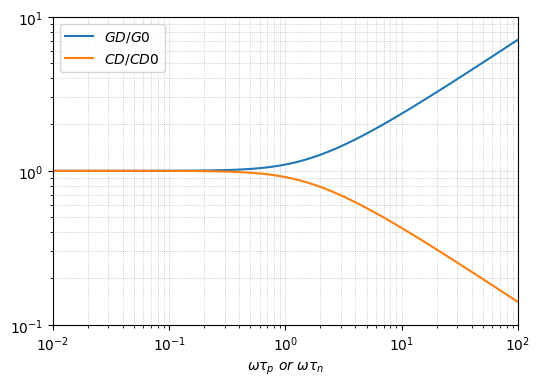

In [42]:
# Fig 7.10 page 320
# diffusion capacitance and diffusion conductance normalized to their low-frequency values as a function of wtau(p+n, n+p diode), CD0=G0tau/2
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

wtau=np.logspace(-2,2,101)
GDG0=1/np.sqrt(2)*np.sqrt(np.sqrt(1+wtau**2)+1)
CDCD0=np.sqrt(2)/wtau*np.sqrt(np.sqrt(1+wtau**2)-1)

plt.figure(figsize=(6, 4))
plt.loglog(wtau, GDG0, label=r"$GD/G0$")
plt.loglog(wtau, CDCD0, label=r"$CD/CD0$")
plt.xlim(0.01,100), plt.ylim(0.1, 10)
plt.xlabel(r"$\omega \tau_p\ or\ \omega \tau_n$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

#### Exersice 7.4
$$C_J=\frac{C_J0}{\left(1-\frac{V_A}{V_{bi}} \right)^{1/2}} $$
$$C_D=\frac{\tau_n G_0}{\omega \tau_n \sqrt{2}}\left(\sqrt{1+\omega^2\tau_n^2}-1 \right)^{1/2} $$
$$G_0=\frac{q}{kT}I_0e^{qV_A/n1kT} $$

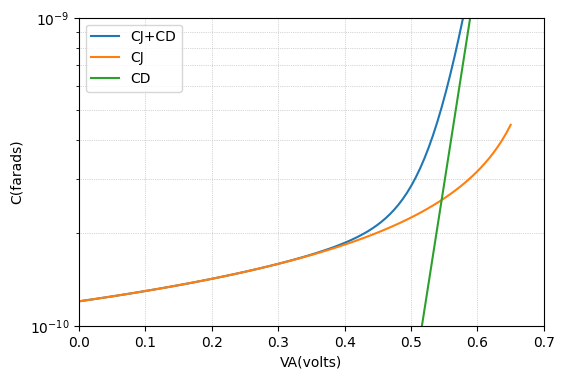

In [85]:
# Exercise 7.4 Forward-Bias Capacitance
# CJ0=120pF, Vbi=0.7V, I0=8e-13, n1=1.22 taun=5e-7sec, f=31.8Mhz, wtau=0.01
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
CJ0=120e-12; I0=8e-13; n1=1.22; wtau=0.01; taun=5e-7
Vbi=0.7

VA=np.linspace(0,0.65,101)
CJ=CJ0/np.sqrt(1-VA/Vbi)
G0=1/(k*T)*I0*np.exp(VA/(n1*k*T))
CD=taun*G0/(np.sqrt(2)*wtau)*np.sqrt(np.sqrt(1+wtau**2)-1)
Cap=CJ+CD

plt.figure(figsize=(6, 4))
plt.semilogy(VA, Cap, label="CJ+CD")
plt.semilogy(VA, CJ, label="CJ")
plt.semilogy(VA, CD, label="CD")
plt.xlim(0,0.7), plt.ylim(1e-10, 1e-9)
plt.xlabel("VA(volts)"), plt.ylabel("C(farads)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


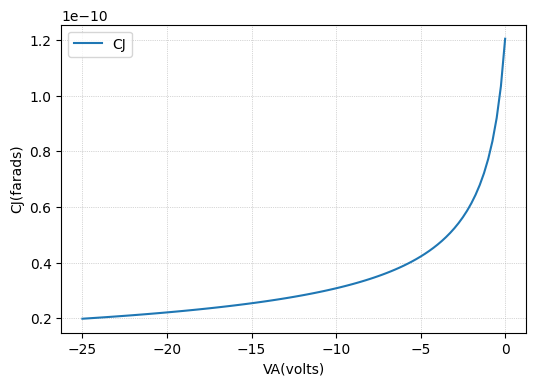

In [90]:
# Problem 7.3 page 325
# Fully dimensioned Reverse-bias C-V curves with appropriate for p+n junction diodes
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
T=300
A=3.72e-3
NB=8.84e15
Vbi=0.7
VAmax=25

VA=np.linspace(0, -VAmax, 101)
CJ0=(e_si*e0*A)/np.sqrt(2*e_si*e0*Vbi/(q*NB))
CJ=CJ0/np.sqrt(1-VA/Vbi)

plt.figure(figsize=(6, 4))
plt.plot(VA, CJ, label="CJ")
#plt.xlim(-VAmax,0), plt.ylim(0, 1.2e-10)
plt.xlabel("VA(volts)"), plt.ylabel("CJ(farads)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

In [98]:
# Problem 7.4 1N4002, p+n junction diodes, stray capacitance 3pF, A=6e-3
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
A=6e-3 #cm2
a=8.254e20
b=1.123e21

NA=2/(q*e_si*e0*A**2*b)
print(f"NA={NA:.2e}/cm3")

Vbi=a/b
print(f"Vbi={Vbi:.3f}V")
#page205, exercise 5.1
Vbi_cal=Eg(T)/2+k*T*np.log(NA/ni(T))
print(f"Vbi_cal={Vbi_cal:.3f}V")

NA=2.98e+14/cm3
Vbi=0.735V
Vbi_cal=0.829V


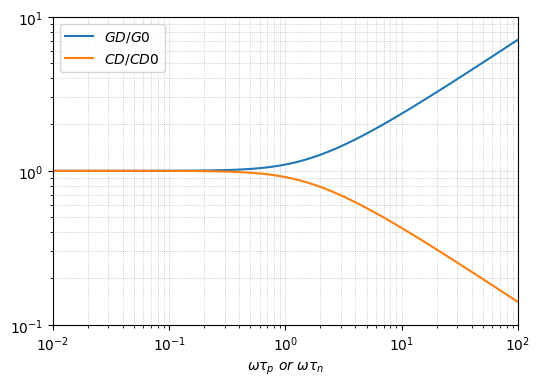

In [99]:
# Problem 7.7 page 326
# diffusion capacitance and diffusion conductance normalized to their low-frequency values as a function of wtau(p+n, n+p diode), CD0=G0tau/2
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

wtau=np.logspace(-2,2,101)
GDG0=1/np.sqrt(2)*np.sqrt(np.sqrt(1+wtau**2)+1)
CDCD0=np.sqrt(2)/wtau*np.sqrt(np.sqrt(1+wtau**2)-1)

plt.figure(figsize=(6, 4))
plt.loglog(wtau, GDG0, label=r"$GD/G0$")
plt.loglog(wtau, CDCD0, label=r"$CD/CD0$")
plt.xlim(0.01,100), plt.ylim(0.1, 10)
plt.xlabel(r"$\omega \tau_p\ or\ \omega \tau_n$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

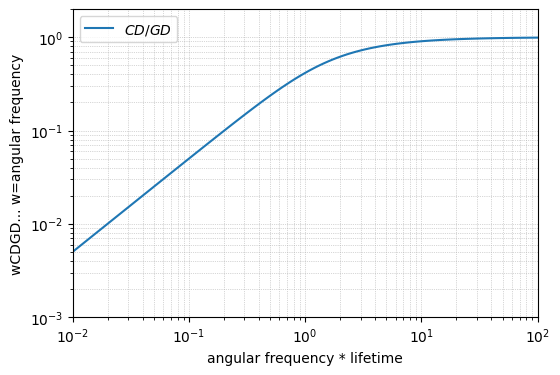

In [106]:
# Problem 7.8 page 326
# Relative size of the capacitive and conductive
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

wtau=np.logspace(-2,2,101)
CDGD=np.sqrt((np.sqrt(1+wtau**2)-1)/(np.sqrt(1+wtau**2)+1))

plt.figure(figsize=(6, 4))
plt.loglog(wtau, CDGD, label=r"$CD/GD$")
plt.xlim(0.01,100), plt.ylim(1e-3, 2)
plt.xlabel("angular frequency * lifetime"); plt.ylabel("wCDGD... w=angular frequency") 
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()